# Question 3: Logistic Regression

In [1]:
#Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [2]:
# load the data
data_input_0 = pd.read_csv("/home/akshay/Downloads/MAIL/Assignment 2/class0-input.csv")
data_input_1 = pd.read_csv("/home/akshay/Downloads/MAIL/Assignment 2/class1-input.csv")
data_labels = pd.read_csv("/home/akshay/Downloads/MAIL/Assignment 2/labels.csv")

# Perform important operations on the data
X = pd.concat([data_input_0,data_input_1],axis=0)
X = X.to_numpy()
X = np.float64(X)
Y = data_labels.to_numpy()
Y = np.float64(Y)

## Check the shape

In [3]:
# Shape of X
print(X.shape)
# Shape of Y
print(Y.shape)

(10000, 2)
(10000, 1)


## Visualize the data

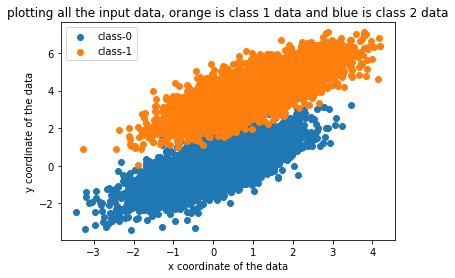

In [4]:
# Use different colors for each class
# Use plt.scatter
fig, ax = plt.subplots(1)
ax.scatter(X[:5000,0],X[:5000,1],label="class-0")
ax.scatter(X[5000:10000,0],X[5000:10000,1],label="class-1")
# Dont forget to add axes titles, graph title, legend
ax.set_xlabel("x coordinate of the data")
ax.set_ylabel("y coordinate of the data")
ax.set_title("plotting all the input data, orange is class 1 data and blue is class 2 data")
ax.legend()

## Define the required functions

In [5]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(x):
    sig_x = 1/(1 + np.exp(-x))
    return sig_x

In [6]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(Y,X,sig_x):
    grad_x1 = (Y - sig_x).squeeze()*X[:,0]
    grad_x2 = (Y - sig_x).squeeze()*X[:,1]
    grad_x0 = (Y - sig_x)
    current_grads = np.asarray([[np.sum(grad_x0)/Y.shape[0]],[np.sum(grad_x1)/Y.shape[0]]
                                ,[np.sum(grad_x2)/Y.shape[0]]])
    #print(current_grads)
    return current_grads


In [7]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    prev_weights += learning_rate*current_grads
    return prev_weights

In [8]:
# Use the implemented functions in the main function
# 'main' fucntion should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weigths randomly
def main(X, Y, weights, learning_rate = 0.0005, num_steps = 50000):
    updated_weights = weights
    for j in range(num_steps):
        sig_x = sigmoid(X@updated_weights[1:3] + updated_weights[0])
        #predicted = np.where(sig_x<=0.5,0,1)
        current_grads = calculate_gradients(Y,X,sig_x)
        updated_weights = update_weights(updated_weights,current_grads,learning_rate)
        
    return updated_weights

In [9]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(final_weights,X):
    sig_x = sigmoid(X@final_weights[1:3] + final_weights[0])
    return sig_x

## Visualize the misclassification

In [10]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
#initial_weights = np.random.rand(3,1)
initial_weights = np.asarray([[0.],[0.],[0.]])
final_weights = main(X,Y,weights=initial_weights)
predicted = predict(final_weights,X)
predicted = np.where(predicted<=0.5,0,1)
accuracy = np.sum(predicted == Y)/Y.shape[0]
print("Accuracy: ",accuracy,"Intercept: ",final_weights[0],"Coefficients: ",final_weights[1],final_weights[2])

Accuracy:  0.984 Intercept:  [-2.20981838] Coefficients:  [-0.59123076] [1.55533894]


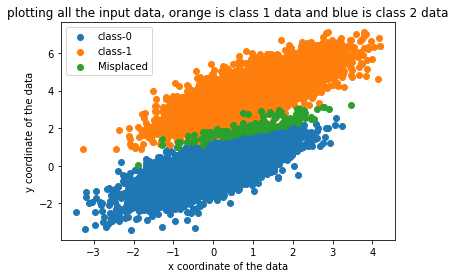

In [11]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
class0_x,class0_y,class1_x, class1_y, mis_class_x, mis_class_y = [], [], [], [], [], []
for i in range(predicted.shape[0]):
    if(predicted[i] == Y[i] == 0):
        class0_x.append(X[i,0])
        class0_y.append(X[i,1])
        
    elif(predicted[i] == Y[i] == 1):
        class1_x.append(X[i,0])
        class1_y.append(X[i,1])
    
    else:
        mis_class_x.append(X[i,0])
        mis_class_y.append(X[i,1])
#print(len(mis_class_x))
fig, ax = plt.subplots(1)
ax.scatter(class0_x,class0_y,label="class-0")
ax.scatter(class1_x,class1_y,label="class-1")
ax.scatter(mis_class_x,mis_class_y,label="Misplaced")
# Dont forget to add axes titles, graph title, legend
ax.set_xlabel("x coordinate of the data")
ax.set_ylabel("y coordinate of the data")
ax.set_title("plotting all the input data, orange is class 1 data and blue is class 2 data")
ax.legend()

## Compare the results with sklearn's Logistic Regression

In [12]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model

In [13]:
import sklearn
from sklearn.linear_model import LogisticRegression

Y = Y.reshape(10000)

log_reg_obj = LogisticRegression()
log_reg_obj.fit(X,Y)
print(log_reg_obj.coef_,log_reg_obj.intercept_,log_reg_obj.score(X, Y))

[[-3.92166117  6.5756403 ]] [-11.2220325] 0.9948


## Accuracy given by my model: .984
## SKLearn Accuracy: .9948
### Both accuracies are equal. To increase the accuracy
  1. We can pass in the data in batches
  2. Optimizing the hyperparameters including lr

In [2]:
import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = dat
xv, yv = np.meshgrid(x, y)
x,y,xv, yv 

(array([0. , 0.5, 1. ]),
 array([0., 1.]),
 array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))